In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Walmart

!Question Exam June 2024!

Below are Wal-Mart's quarterly sales (expressed in billion dollars)
1. Convert the “startdate” to the datatype datetime.
2. Create the plot below.

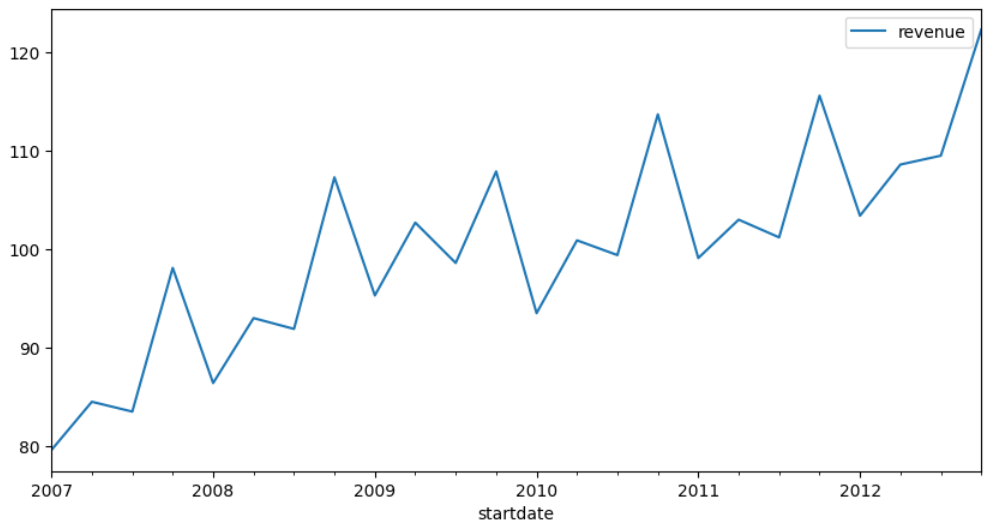

3. Make a forecast for next accounting year's sales using the most appropriate method. Explain why you chose this method.
4. Make a plot including the forecast for the next accounting year.
5. In which quarter will sales exceed $150 billion for the first time? [2018-10-01]

In [42]:
dfwalmart = pd.DataFrame(data={
    'startdate': ['2007/01/01', '2007/04/01', '2007/07/01', '2007/10/01', '2008/01/01', '2008/04/01', '2008/07/01', '2008/10/01','2009/01/01', '2009/04/01', '2009/07/01', '2009/10/01','2010/01/01', '2010/04/01', '2010/07/01', '2010/10/01','2011/01/01', '2011/04/01', '2011/07/01', '2011/10/01','2012/01/01', '2012/04/01', '2012/07/01', '2012/10/01'],
    'quarter': ['2007-1','2007-2','2007-3','2007-4','2008-1','2008-2','2008-3','2008-4','2009-1','2009-2','2009-3','2009-4','2010-1','2010-2','2010-3','2010-4','2011-1','2011-2','2011-3','2011-4','2012-1','2011-2','2011-3','2011-4'],
    'revenue': [79.6,84.5,83.5,98.1,86.4,93,91.9,107.3,95.3,102.7,98.6,107.9,93.5,100.9,99.4,113.7,99.1,103,101.2,115.6,103.4,108.6,109.5,122.3]
})

dfwalmart.head()

,startdate,quarter,revenue
0,2007/01/01,2007-1,79.6
1,2007/04/01,2007-2,84.5
2,2007/07/01,2007-3,83.5
3,2007/10/01,2007-4,98.1
4,2008/01/01,2008-1,86.4


In [49]:
# 1. Convert the “startdate” to the datatype datetime.

dfwalmart['startdate']= pd.to_datetime(dfwalmart['startdate'])

dfwalmart.set_index('startdate', inplace=True)


<Axes: xlabel='startdate'>

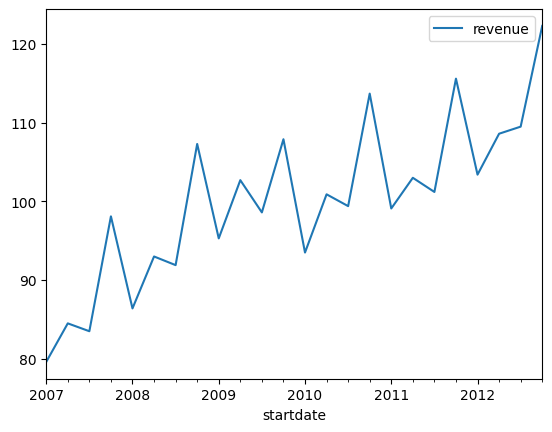

In [51]:
# 2. Create the plot below.
dfwalmart.plot( y='revenue')

In [62]:
# 3. Make a forecast for next accounting year's sales using the most appropriate method. Explain why you chose this method.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfwalmart['revenue']

dfwalmart_rev = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=4, freq="QS").fit()

dfwal_pred = dfwalmart_rev.forecast(4)

#gebruik TES omdat er een duidelijk trend is met seizoenale schommelingen. Hiervoor is TES het meest
#geschikt aangezien die met beide ook rekening houdt.

<Axes: xlabel='startdate'>

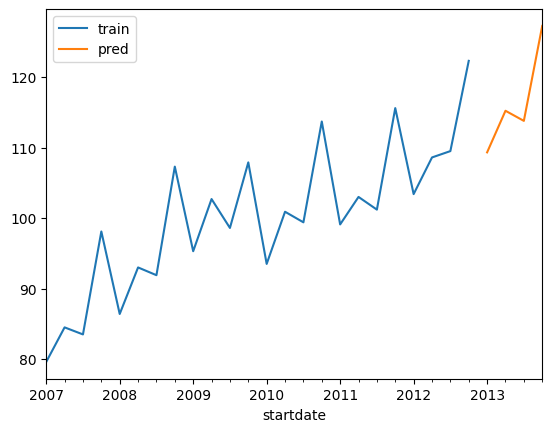

In [63]:
# 4.Make a plot including the forecast for the next accounting year.

train.plot(legend=True, label='train')
dfwal_pred.plot(legend=True, label='pred')

In [72]:
# 5. In which quarter will sales exceed $150 billion for the first time?
dfwal_predict = dfwalmart_rev.forecast(40)
dfwal_predict[dfwal_predict > 150].index[0]


Timestamp('2018-10-01 00:00:00')